## 0. Utility

In [1]:
import random
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def check_fun(ref_fun, fun, input_gen, ntimes=10, **kwargs):
    "Check fun with reference implementation."
    for _ in range(ntimes):
        input_ = input_gen(**kwargs)
        assert(fun(*input_) == ref_fun(*input_))
    print("Tests passed")    

In [3]:
def generate_shuffle_array(n=1000):
    "Generate a shuffled array [0...n)"
    array = list(range(n))
    random.shuffle(array)
    return (array, )

In [4]:
def scaling_analyze(fun, input_gen, max_exp=4):
    "Do scaling analysis on fun from 10**0 to 10**max_exp."
    ns, times = [], []
    for e in range(max_exp + 1):
        n = 10 ** e
        ns.append(n)
        input_ = input_gen(n)
        start = timer()
        _ = fun(input_)
        end = timer()
        times.append(end - start)
    return ns, times

In [5]:
# ns, times = scaling_analyze(sorted, generate_shuffle_array, max_exp=6)
# plt.loglog(ns, times, 'bo')

## 1. Selection Sort

![selection sort](images/selection-sort.PNG)

In [6]:
def selection_sort(array):
    "Implement selection sort to sort an array."
    A = list(array)
    n = len(A)
    for i in range(n):
        min_idx = i
        for j in range(i + 1, n):
            if A[j] < A[min_idx]:
                min_idx = j
        A[min_idx], A[i] = A[i], A[min_idx]
    return A

In [7]:
check_fun(sorted, selection_sort, generate_shuffle_array, n = 500, ntimes=10)

Tests passed


In [8]:
# ns, times = scaling_analyze(selection_sort, generate_shuffle_array, max_exp=4)

In [9]:
# plt.loglog(ns, times, 'bo')

## 2. Insertion Sort

![Insertion_Sort](images/insertion-sort.PNG)

In [10]:
def insertion_sort(array):
    "Implement insertion sort to sort an array."
    A = list(array)
    n = len(A)
    for k in range(n - 1):
        i = k + 1
        while i > 0 and A[i - 1] > A[i]:
            A[i - 1], A[i] = A[i], A[i - 1]
            i -= 1
    return A

In [11]:
check_fun(sorted, insertion_sort, generate_shuffle_array, n=500, ntimes=10)

Tests passed


## 3. Bubble Sort

![Bubble Sort](images/bubble-sort.PNG)

In [12]:
def bubble_sort(array):
    "Implement bubble sort to sort an array."
    A = list(array)
    n = len(A)
    for s in range(n - 1):
        for k in range(n - 1 - s):
            if A[k] > A[k + 1]:
                A[k], A[k + 1] = A[k + 1], A[k]
    return A

In [13]:
check_fun(sorted, bubble_sort, generate_shuffle_array, n=500, ntimes=10)

Tests passed


## 4. Merge Sort

![Merge Sort](images/merge-sort.PNG)

In [14]:
def merge_sort(array):
    "Implement merge sort to sort an array."
    A = list(array)
    def merge_sort_helper(A):
        "helper function of merge sort"
        n = len(A)
        if n == 1:
            return A
        else:
            m = n // 2
            L = merge_sort_helper(A[:m])
            R = merge_sort_helper(A[m:])
            i, l, r = 0, 0, 0
            nL, nR = len(L), len(R)
            while l < nL and r < nR:
                if L[l] < R[r]:
                    A[i] = L[l]
                    l += 1
                else:
                    A[i] = R[r]
                    r += 1
                i += 1
            for j in range(l, nL):
                A[i] = L[j]
                i += 1
            for j in range(r, nR):
                A[i] = R[j]
                i += 1
            return A
    return merge_sort_helper(A)

In [15]:
check_fun(sorted, merge_sort, generate_shuffle_array, n=500, ntimes=10)

Tests passed


In [16]:
# ns, times = scaling_analyze(sorted, generate_shuffle_array, max_exp=7)
# plt.loglog(ns, times, 'bo')

## 5. Quick Sort

![Quick Sort](images/quick-sort.PNG)

In [17]:
def quick_sort(array):
    "Implement quick sort to sort an array."
    A = list(array)
    def partition(A, lo, hi):
        "partition function."
        i = lo - 1
        pivot = A[hi]
        for j in range(lo, hi):
            if A[j] <= pivot:
                i = i + 1
                A[i], A[j] = A[j], A[i]
        A[i + 1], A[hi] = A[hi], A[i + 1]
        return i + 1
    def quick_sort_helper(A, lo, hi):
        "quick sort helper function."
        if lo < hi:
            i = partition(A, lo, hi)
            quick_sort_helper(A, lo, i - 1)
            quick_sort_helper(A, i + 1, hi)
    quick_sort_helper(A, 0, len(A) - 1)
    return A

In [18]:
check_fun(sorted, quick_sort, generate_shuffle_array, n=500, ntimes=10)

Tests passed


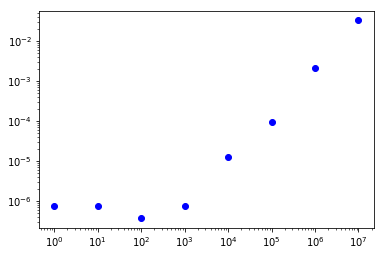

In [19]:
ns, times = scaling_analyze(sorted, generate_shuffle_array, max_exp=7)
plt.loglog(ns, times, 'bo')

## 6. Bucket Sort

![Bucket Sort](images/bucket-sort.PNG)

In [20]:
def bucket_sort(array):
    "Implement Bucket sort of an array."
    A = list(array)
    mn, mx = min(A), max(A)
    C = [0] * (mx - mn + 1) # counter
    for num in A:
        C[num - mn] += 1
    k = 0
    for i in range(mn, mx + 1):
        for j in range(C[i - mn]):
            A[k] = i
            k += 1
    return A

In [21]:
check_fun(sorted, bucket_sort, generate_shuffle_array, n=500, ntimes=10)

Tests passed


## 7. Count Inversions

![Count and Sort](images/count-and-sort.PNG)

In [22]:
def count_inversions_naive(array):
    "Naive implementation of inversions."
    n = len(array)
    cnt = 0
    for i in range(n):
        for j in range(i + 1, n):
            if array[j] < array[i]:
                cnt += 1
    return cnt

In [23]:
def count_and_sort(array):
    "Count and sort."
    A = list(array)
    def count_and_sort_helper(A):
        n = len(A)
        if n == 1:
            return (0, A)
        else:
            m = n // 2
            cl, L = count_and_sort_helper(A[:m])
            cr, R = count_and_sort_helper(A[m:])
            c_cross = count_cross(L, R)
            c = cl + cr + c_cross
            B = merge(L, R)
            return (c, B)
    return count_and_sort_helper(A)

In [24]:
import heapq
def merge(L, R):
    "Return merged array of sorted L and R."
    return list(heapq.merge(L, R))

![Count Cross](images/count-cross.PNG)

In [25]:
def count_cross(L, R):
    "count inversions between L and R."
    l, r, c = 0, 0, 0
    nL, nR = len(L), len(R)
    while l < nL and r < nR:
        if L[l] <= R[r]:
            l += 1
        else:
            c += nL - l
            r = r + 1
    return c

In [26]:
def count_inversions(array):
    "implementation of counting inversions."
    c, _ = count_and_sort(array)
    return c

In [27]:
check_fun(count_inversions_naive, count_inversions, generate_shuffle_array, n=500, ntimes=10)

Tests passed
